# Simular un tiempo de servicio aleatorio
Utilizaremos una distribución discreta arbitraria para generar muestras aleatorias.

Transformar un numero aleatorio a un tiempo de servicio descrito con una probabilidad.

Un servicio autmatizado telefonico informativo tarda 3, 6 o 10 minutos por cada llamada. La proporcion de estos tiempoes es de 30%, 45% y 25% respectivamente.

Ejemplo de Monte Carlo?

![Random dart](randomDart.jpg)

In [1]:
def getCumulative(probabilities):
    cumulative = []
    cumulative.append(probabilities[0])
    for i in range(1, len(probabilities)):
        cumulative.append(cumulative[i-1] + probabilities[i])
    return cumulative

In [2]:
import random
random.seed(1234)

times = [3, 6, 10]
probabilities = [0.3, 0.45, 0.25]

cumulatives = getCumulative(probabilities)
print(cumulatives)

[0.3, 0.75, 1.0]


In [3]:
def getServiceTime(times, cumulative):
    assert len(times) == len(cumulative)
    r = random.random()
    for i in range(len(cumulative)):
        if r < cumulative[i]:
            return times[i]


In [4]:
# Generting service times
num_customers = 25

def generateServiceTimes():
    service_times = [getServiceTime(times, cumulatives) for _ in range(num_customers)]
    return service_times

service_times = generateServiceTimes()
print(service_times)

[10, 6, 3, 10, 10, 6, 6, 3, 10, 3, 3, 10, 6, 6, 6, 3, 3, 3, 3, 6, 10, 3, 6, 6, 6]


<AxesSubplot:>

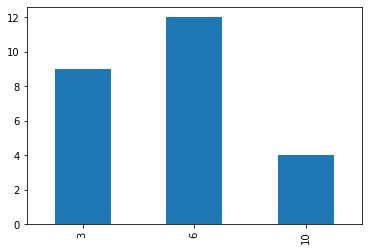

In [5]:
import pandas as pd

service_times = generateServiceTimes()
frequency = pd.Series(service_times).value_counts().sort_index()
# print(frequency)

frequency.plot(kind='bar')